# Numerical solution of the Heat Equation


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
def TemperatureSOR(temp, omega):
    """
    Uses the successive over-relaxation method 
    Inputs:
        temp - array like, 2 dimensional. The previous temperature
            iteration we should be updating
        omega -
    Outputs:
        temp - inputed temperature array after SOR iteration update.
    """
    for i in range(1,len(temp)-1):
        for j in range(1,len(temp[0])-1):
            temp[i,j] = 0.25*(1+omega)*(temp[i+1,j] + temp[i-1, j] + temp[i,j+1] + temp[i, j-1]) - omega*temp[i,j]
    return temp


In [4]:
def CreateInitialTemperatureArray(X, Y, guessTemp=300, boundaryTemp=400):
    temperature = np.zeros((X,Y))
    temperature[0,:]=temperature[X-1,:]=temperature[:,0]= guessTemp
    temperature[:,Y-1]= boundaryTemp
    return temperature

def IterateSOR(temperature, omega, tol):
    maxDiff = 1
    i = 0
    while maxDiff > tol:
        i+=1
        lastTemp = np.copy(temperature)
        temperature = TemperatureSOR(temperature, omega)
        maxDiff = np.max(np.abs(lastTemp-temperature))
    return temperature, i


Solution found after  270 iterations for omega= 0.1


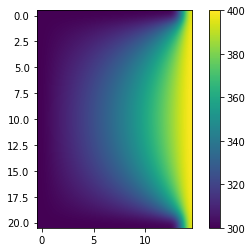

In [5]:
xSize = 21 #m
ySize = 15 #m
resolution = 1 #Number of divisions per metre
X = xSize*resolution
Y = ySize*resolution
temperature = CreateInitialTemperatureArray(X,Y)

tol = 1e-4
omega = 0.1

result, i = IterateSOR(temperature, omega, tol)
print("Solution found after ", i, "iterations for omega=",omega)
plt.imshow(result, interpolation='bicubic')
plt.colorbar()
plt.show()

In [6]:
for omega in (np.linspace(0.1, 0.9, 9)):
    temperature = CreateInitialTemperatureArray(X,Y)
    result, i = IterateSOR(temperature, omega, tol)
    print("Solution found after ", i, "iterations for omega=",omega)

print("\nNarrow down value of omega\n")
minOmega = 0.6
minI = np.inf
for omega in (np.linspace(0.6, 0.8, 11)):
    temperature = CreateInitialTemperatureArray(X,Y)
    result, i = IterateSOR(temperature, omega, tol)
    if(i < minI):
        minI = i
        minOmega = omega
    print("Solution found after ", i, "iterations for omega=",omega)

print("\nMost efficienct value of omega found to be ",minOmega, " which took ", minI, "iterations")

Solution found after  270 iterations for omega= 0.1
Solution found after  223 iterations for omega= 0.2
Solution found after  182 iterations for omega= 0.30000000000000004
Solution found after  146 iterations for omega= 0.4
Solution found after  113 iterations for omega= 0.5
Solution found after  81 iterations for omega= 0.6
Solution found after  51 iterations for omega= 0.7000000000000001
Solution found after  82 iterations for omega= 0.8
Solution found after  155 iterations for omega= 0.9

Narrow down value of omega

Solution found after  81 iterations for omega= 0.6
Solution found after  74 iterations for omega= 0.62
Solution found after  67 iterations for omega= 0.64
Solution found after  60 iterations for omega= 0.66
Solution found after  50 iterations for omega= 0.68
Solution found after  51 iterations for omega= 0.7
Solution found after  54 iterations for omega= 0.72
Solution found after  59 iterations for omega= 0.74
Solution found after  66 iterations for omega= 0.76
Solution 

In [7]:
def UpdateTemperature(temp, zeta):
    X = len(temp)
    Y = len(temp[0])
    temp_next = np.zeros((X,Y))
    for i in range(1, len(temp)-1):
        for j in range(1, len(temp[0])-1):
            temp_next[i,j] = temp[i,j] + zeta*(temp[i+1,j]+temp[i-1,j] + temp[i,j+1]+temp[i,j-1]-4*temp[i,j])
    return temp_next

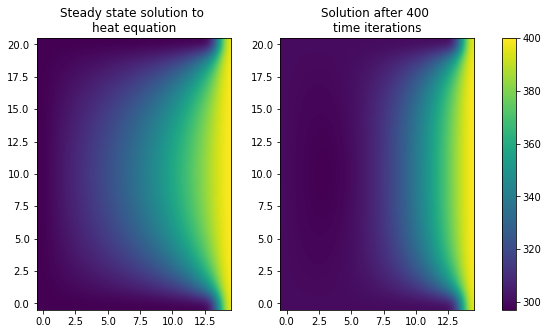

In [8]:

#Create array for time dependent temperatures, 
#set first element to initial temperature map
temperatures = [CreateInitialTemperatureArray(X,Y)]
#Define required values
nt = 400
zeta = 0.1
#Iterate over time
for n in range(1, nt):
    #Append updated temperature
    temperatures.append(UpdateTemperature(temperatures[n-1], zeta))
    #Reset updated temperature boundary conditions.
    temperatures[n][0,:]=temperatures[n][X-1,:]=temperatures[n][:,0]= 300
    temperatures[n][:,Y-1]=400

    
fig = plt.figure(figsize=(10,5))

SOR_fig = fig.add_subplot(121)
SOR_im = SOR_fig.imshow(temperature,interpolation='bicubic', origin='lower')
SOR_fig.set_title("Steady state solution to \nheat equation")

timeStep_fig = fig.add_subplot(122)
timeStep_im = timeStep_fig.imshow(temperatures[-1], interpolation='bicubic', origin='lower')
timeStep_fig.set_title("Solution after " + str(nt) + " \ntime iterations")

fig.colorbar(timeStep_im, ax=fig.axes[:2])
plt.show()
    #temperature[0,:]=temperature[X-1,:]=temperature[:,0]= guessTemp
    #temperature[:,Y-1]= boundaryTemp

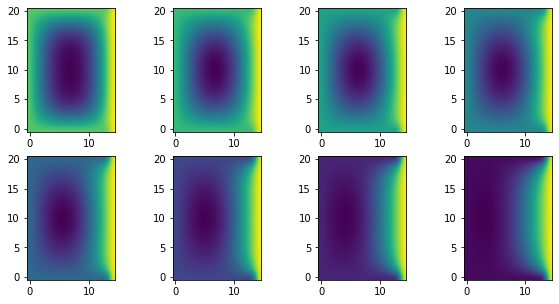

In [20]:
temperatures = [CreateInitialTemperatureArray(X,Y)]
#Define required values
nt = 400
zeta = 0.1
#Iterate over time
for n in range(1, nt):
    #Append updated temperature
    temperatures.append(UpdateTemperature(temperatures[n-1], zeta))
    #Reset updated temperature boundary conditions.
    temperatures[n][0,:]=temperatures[n][X-1,:]=temperatures[n][:,0]= 300
    temperatures[n][:,Y-1]=400
    
fig = plt.figure(figsize=(10,5))
i=0
for y in range(2):
    for x in range(4):
        i+=1
        ni = 240 + (i)
        index = int(nt/8 * i)-1
        subplot = fig.add_subplot(ni)
        subplot.imshow(temperatures[index], interpolation='bicubic', origin='lower')

plt.show()

